<a href="https://www.kaggle.com/code/suhasbhat090/linear-regression-on-tesla-stock-data?scriptVersionId=202804550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
## This is an attempt at applying linear regression on stock data.
# I used tesla-stock-price dataset(which has data between 29/6/2017 to 17/3/2017)
# I used statesmodel and sklearn both
# Also used Ridge regression

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/kaggle/input/tesla-stock-price/Tesla.csv - Tesla.csv.csv')

In [4]:
df.head(1)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.0,25.0,17.540001,23.889999,18766300,23.889999


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [7]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


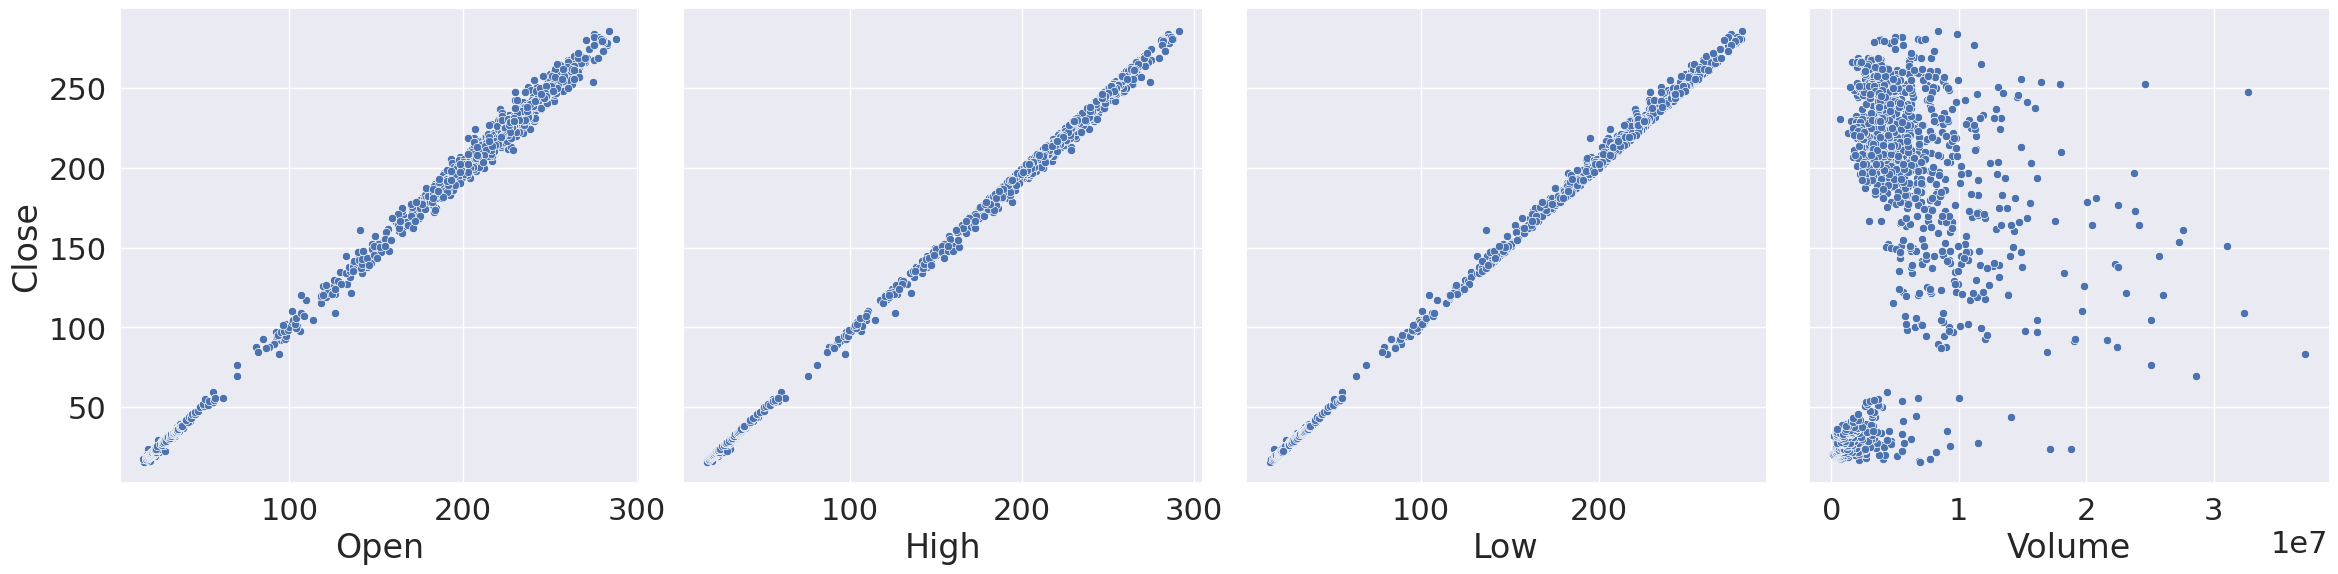

In [8]:
sns.set(font_scale = 2)
sns.pairplot(
data = df,
y_vars = ['Close'],
x_vars = ['Open','High','Low','Volume'],
height = 6
)

In [9]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]

<Axes: >

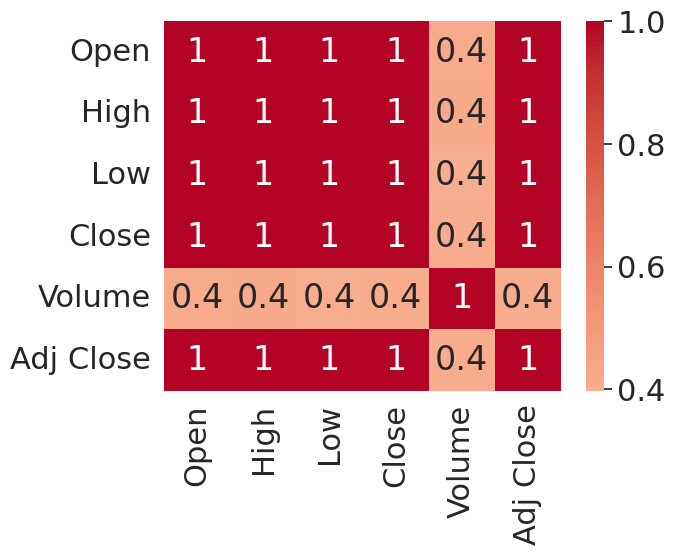

In [10]:
sns.heatmap(
df.corr(),
annot = True,
fmt = '.1g',
center = 0,
cmap = 'coolwarm')

In [11]:
df.shape

(1692, 6)

In [12]:
y = df['Close']
x = df.drop(columns = ['Close','Adj Close'])

**OLS Regression using stats model**


In [13]:
x = sm.add_constant(x)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [15]:
x_train.shape

(1353, 5)

In [16]:
model = sm.OLS(y_train,x_train).fit()

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.330e+06
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        08:50:43   Log-Likelihood:                -2469.0
No. Observations:                1353   AIC:                             4948.
Df Residuals:                    1348   BIC:                             4974.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0153      0.072      0.211      0.8

In [18]:
predictions_ols = model.predict(x_test)
predictions_ols[:5]

504      32.080747
367      30.790296
1202    208.135182
228      27.096528
928     248.051481
dtype: float64

In [19]:
mae_ols = mean_absolute_error(y_test, predictions_ols)
rmse_ols = np.sqrt(mean_squared_error(y_test, predictions_ols))
print("OLS MAE:", round(mae_ols, 2))
print("OLS RMSE:", round(rmse_ols, 2))

OLS MAE: 0.97
OLS RMSE: 1.43


**Ridge Regression**

In [20]:
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [21]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(x_scaled_train,y_train)

Ridge(alpha=10)

In [22]:
pred_ridge = ridge_model.predict(x_scaled_test)

In [23]:
# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred_ridge))
print("Ridge MAE:", round(mae_ridge, 2))
print("Ridge RMSE:", round(rmse_ridge, 2))

Ridge MAE: 1.64
Ridge RMSE: 2.48


In [24]:
cv_scores = cross_val_score(ridge_model, x_scaled_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print("Cross-validated RMSE (Ridge):", round(cv_rmse, 2))

Cross-validated RMSE (Ridge): 2.4


In [25]:
# Final results
print("\nModel Performance Comparison:")
print(f"OLS MAE: {round(mae_ols, 2)}, OLS RMSE: {round(rmse_ols, 2)}")
print(f"Ridge MAE: {round(mae_ridge, 2)}, Ridge RMSE: {round(rmse_ridge, 2)}")
print(f"Cross-validated RMSE (Ridge): {round(cv_rmse, 2)}")


Model Performance Comparison:
OLS MAE: 0.97, OLS RMSE: 1.43
Ridge MAE: 1.64, Ridge RMSE: 2.48
Cross-validated RMSE (Ridge): 2.4


**Linear Regression Using sklearn**

In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(x_train,y_train)

LinearRegression()

In [28]:
print(regressor.coef_)

[ 0.00000000e+00 -5.43152260e-01  8.34368065e-01  7.07960586e-01
 -3.20297836e-08]


In [29]:
print(regressor.intercept_)

0.015285274163716167


In [30]:
pred_sk = regressor.predict(x_test)


In [31]:
print(pred_sk)

[ 32.08074683  30.79029606 208.13518204  27.0965279  248.05148128
 182.55047789 195.69759337  33.81656987 206.68860269  30.25076108
  45.10578097 201.21241163 103.49340331 101.30872861 192.86171122
  33.18704822 262.73819474  27.7972384   37.80993063  28.04189128
  37.8429649   35.09895117 233.83865446 183.1208772   37.84521006
 245.29584935 138.28460864 195.00372206  27.52950127 147.29483592
  24.86878436 247.48522466  40.86902978 261.22774646 259.92043339
 195.13293443 215.43375216 208.6111019   24.98439303 203.24810047
 226.2972351  228.35370863 254.89936826  27.81001705 126.54844441
  22.15041371  34.62059787 176.71622435 143.55245961 223.45992712
 122.13908057  27.33700111 256.59213036 205.95997519 194.86278415
 166.32940369 206.31200739  19.99716626 208.55904495 250.71237674
 225.24624781 245.30305051  20.45940143  26.54362939  26.9839697
 191.39975996 258.1138017  164.57744451  31.06257121 224.04808215
 226.54495126 146.68388241 253.14633141 256.52342158 232.61475501
  24.102822

In [32]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted': pred_sk})


In [33]:
data1.head(10)

,Actual,Predicted
504,31.959999,32.080747
367,31.040001,30.790296
1202,210.089996,208.135182
228,26.719999,27.096528
928,246.210007,248.051481
903,182.839996,182.550478
1561,194.470001,195.697593
626,34.000000,33.816570
1151,206.550003,206.688603
564,30.020000,30.250761


In [34]:
mae_sk = mean_absolute_error(y_test, pred_sk)
rmse_sk = np.sqrt(mean_squared_error(y_test, pred_sk))
print("sk MAE:", round(mae_sk, 2))
print("sk RMSE:", round(rmse_sk, 2))

sk MAE: 0.97
sk RMSE: 1.43
